In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

from prime_functions import *
from llama_prime_functions import *


# Testing LLama generation, streaming, caching

In [2]:
prompt = f'2, 3, 5, 7, 11, 13,'
get_llama_primes(prompt, max_output_count=20, print_stream=True, disable_cache=True)


Printing llama response stream:
 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101,

array([ 17,  19,  23,  29,  31,  37,  41,  43,  47,  53,  59,  61,  67,
        71,  73,  79,  83,  89,  97, 101])

In [3]:
test_cache = False

if test_cache: # warning: deletes cache in order to test it

    prompt1 = '2, 3, 5, 7, 11, 13,'
    prompt2 = '13, 17, 19,'

    delete_llama_cache()
    print_llama_cache()

    for i in range(3):
        print(get_llama_primes(prompt1, max_output_count=20))
        print(get_llama_primes(prompt2, max_output_count=10))

    print_llama_cache()


# Testing Prime Sequences

In [4]:
def check_for_differences(seed_start_n, seed_end_n, output_count, preprompt="", print_all=False, print_stream=False):

    full_primes = nth_prime_list(seed_end_n + output_count)
    seed_primes = full_primes[seed_start_n:seed_end_n]

    real_primes = full_primes[seed_start_n:]

    num_seed_primes = len(seed_primes)
    prompt = preprompt + ', '.join([str(p) for p in seed_primes]) + ","

    llama_primes = get_llama_primes(prompt, max_output_count=output_count, print_stream=print_stream)

    if len(llama_primes) < output_count:
        llama_primes = np.append(llama_primes, np.full(output_count - len(llama_primes), -1))

    llama_primes = np.append(seed_primes, llama_primes)

    #print(len(llama_primes), len(real_primes))

    difference_exists = False
    for i in range(num_seed_primes + output_count):
        if print_all:
            if i < num_seed_primes:
                print(i + seed_start_n, real_primes[i], llama_primes[i], "seed")
            elif real_primes[i] != llama_primes[i]:
                print(i + seed_start_n, real_primes[i], llama_primes[i], "difference!")
            else:
                print(i + seed_start_n, real_primes[i], llama_primes[i])
        else:
            if real_primes[i] != llama_primes[i]:
                print("difference!", i, real_primes[i], llama_primes[i])
                difference_exists = True

    if not print_all and not difference_exists:
        print('No differences found')


## First N Primes

In [5]:
check_for_differences(seed_start_n=0, seed_end_n=6, output_count=10, preprompt="", print_all=True)

0 2 2 seed
1 3 3 seed
2 5 5 seed
3 7 7 seed
4 11 11 seed
5 13 13 seed
6 17 17
7 19 19
8 23 23
9 29 29
10 31 31
11 37 37
12 41 41
13 43 43
14 47 47
15 53 53


Seems like llama gets the first primes correct pretty easily.

In [6]:
check_for_differences(seed_start_n=0, seed_end_n=6, output_count=200, preprompt="", print_all=False)

difference! 202 1237 1249
difference! 203 1249 1259
difference! 204 1259 1277
difference! 205 1277 1283


So, it seems like llama fails on the 202nd prime, getting the first 202 correct.

## Consecutive Primes

In [7]:
check_for_differences(seed_start_n=180, seed_end_n=195, output_count=20, preprompt="The following is a list of consecutive primes: ", print_all=True)

180 1087 1087 seed
181 1091 1091 seed
182 1093 1093 seed
183 1097 1097 seed
184 1103 1103 seed
185 1109 1109 seed
186 1117 1117 seed
187 1123 1123 seed
188 1129 1129 seed
189 1151 1151 seed
190 1153 1153 seed
191 1163 1163 seed
192 1171 1171 seed
193 1181 1181 seed
194 1187 1187 seed
195 1193 1117 difference!
196 1201 1123 difference!
197 1213 1133 difference!
198 1217 1139 difference!
199 1223 1151 difference!
200 1229 1153 difference!
201 1231 1163 difference!
202 1237 1171 difference!
203 1249 1181 difference!
204 1259 1187 difference!
205 1277 1193 difference!
206 1279 1213 difference!
207 1283 1217 difference!
208 1289 1223 difference!
209 1291 1229 difference!
210 1297 1231 difference!
211 1301 1237 difference!
212 1303 1249 difference!
213 1307 1259 difference!
214 1319 1277 difference!


It seems like llama performs worse starting partway into a list of primes; it's better at recalling given the whole list from the beginning.

# Prime Plots

llama_prime_fail_point 1508


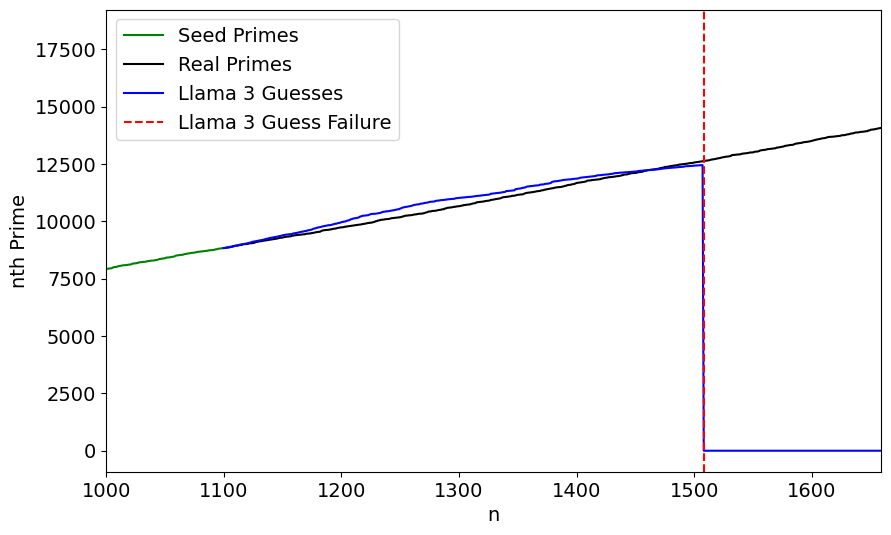

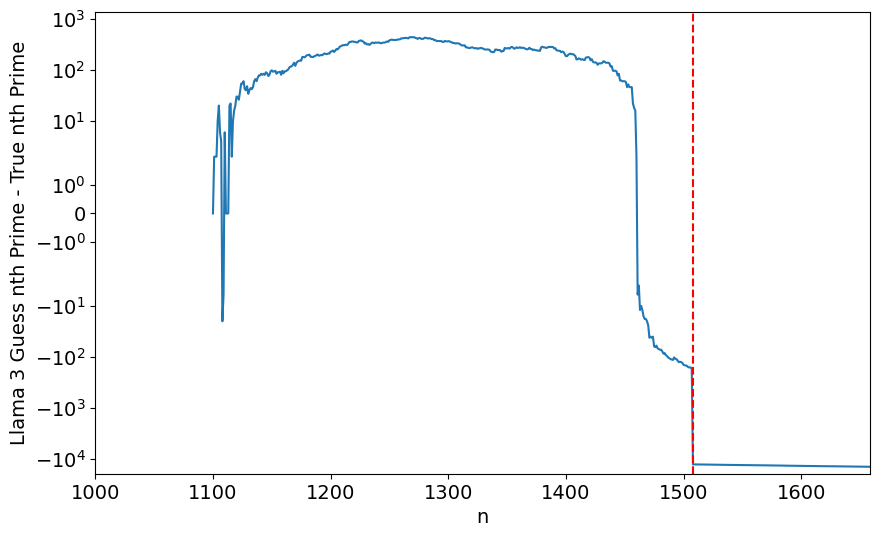

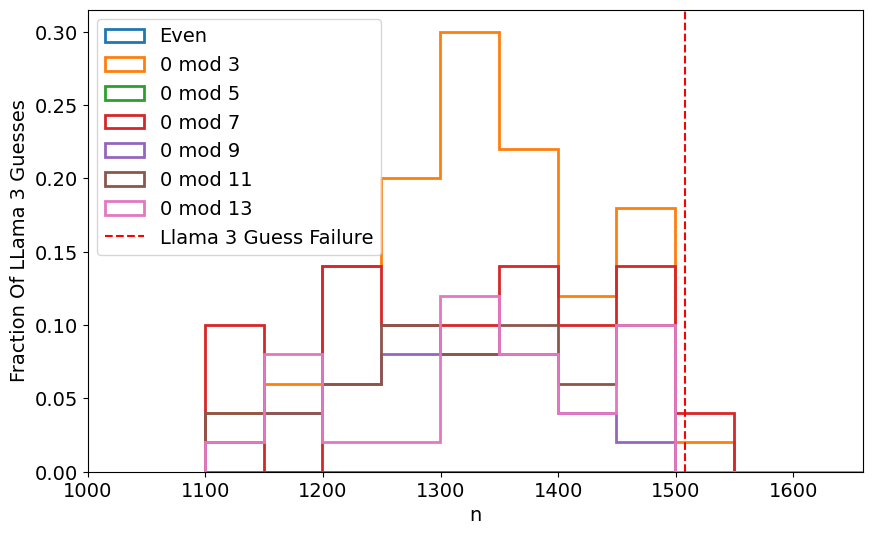

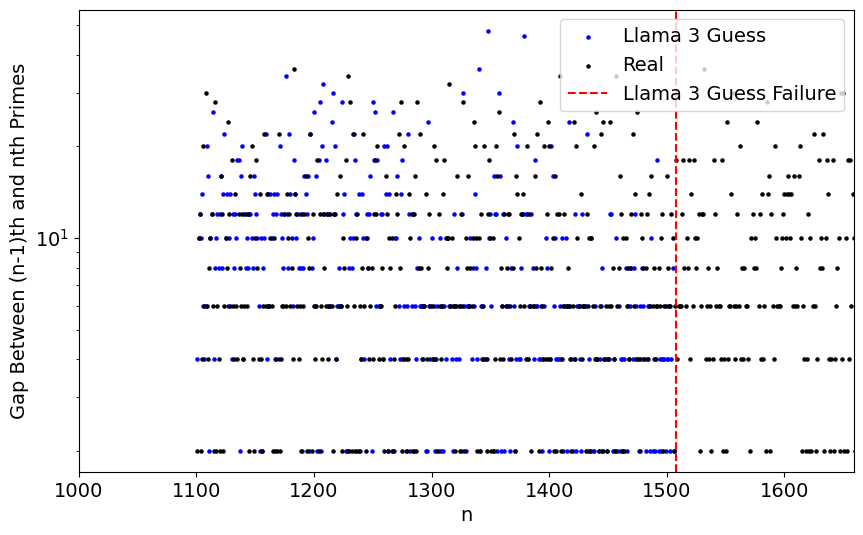

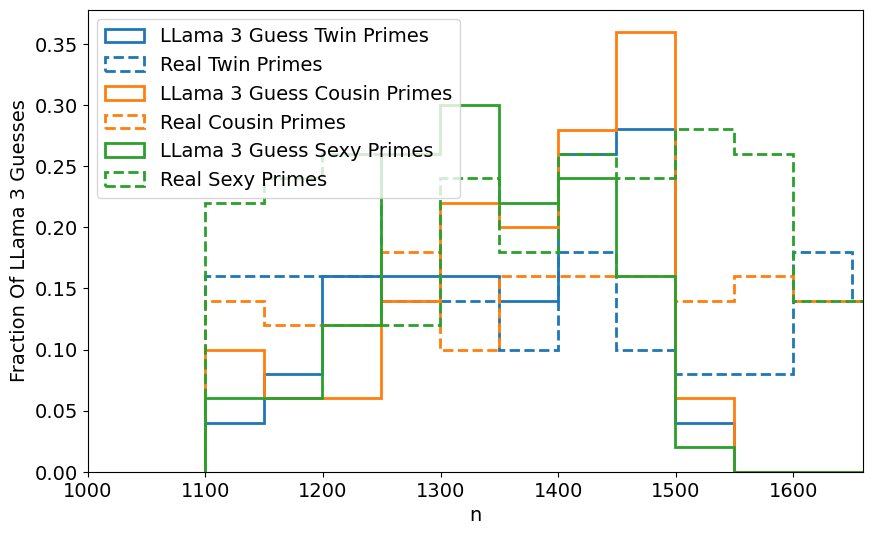

In [8]:
def make_prime_plots(seed_start_n, seed_end_n, output_count, preprompt):

    full_primes = nth_prime_list(seed_end_n + output_count)

    seed_primes = full_primes[seed_start_n:seed_end_n]
    seed_primes_n = np.arange(seed_start_n, seed_end_n)
    real_primes = full_primes[seed_end_n:]
    real_primes_n = np.arange(seed_end_n, seed_end_n + output_count)

    num_seed_primes = len(seed_primes)
    prompt = preprompt + ', '.join([str(p) for p in seed_primes]) + ","
    llama_primes = get_llama_primes(prompt, max_output_count=output_count, print_stream=False)
    if len(llama_primes) < output_count:
        llama_primes = np.append(llama_primes, np.full(output_count - len(llama_primes), -1))
    llama_primes_n = np.arange(seed_end_n, seed_end_n + output_count)

    llama_prime_fail_point = -1
    for n in range(len(llama_primes) - 1):
        if llama_primes[n] == llama_primes[n + 1]:
            llama_prime_fail_point = n + seed_end_n
            print("llama_prime_fail_point", llama_prime_fail_point)
            break    
    mpl.rcParams.update({'font.size': 14})

    plt.figure(figsize=(10, 6))
    plt.plot(seed_primes_n, seed_primes, label='Seed Primes', color='g')
    plt.plot(real_primes_n, real_primes, label='Real Primes', color='k')
    plt.plot(llama_primes_n, llama_primes, label='Llama 3 Guesses', color='b')
    if llama_prime_fail_point >= 0: plt.axvline(llama_prime_fail_point, color='r', linestyle='--', label='Llama 3 Guess Failure')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel("nth Prime")
    if llama_prime_fail_point >= 0: plt.xlim(seed_start_n, llama_prime_fail_point * 1.1)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(llama_primes_n, llama_primes - real_primes)
    if llama_prime_fail_point >= 0: plt.axvline(llama_prime_fail_point, color='r', linestyle='--', label='Llama 3 Guess Failure')
    plt.xlabel('n')
    plt.ylabel("Llama 3 Guess nth Prime - True nth Prime")
    plt.yscale('symlog')
    if llama_prime_fail_point >= 0: plt.xlim(seed_start_n, llama_prime_fail_point * 1.1)
    plt.show()

    plt.figure(figsize=(10, 6))
    llama_primes_even = np.array([p % 2 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_3 = np.array([p % 3 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_5 = np.array([p % 5 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_7 = np.array([p % 7 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_9 = np.array([p % 9 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_11 = np.array([p % 11 == 0 for p in llama_primes], dtype=float)
    llama_primes_0_mod_13 = np.array([p % 13 == 0 for p in llama_primes], dtype=float)
    num_bins = 20
    num_primes_per_bin = int(len(llama_primes_n) / num_bins)
    bins = np.linspace(seed_end_n - 0.5, seed_end_n + num_primes_per_bin * num_bins - 0.5, num_bins + 1)
    plt.hist(llama_primes_n, weights=llama_primes_even / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='Even')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_3 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 3')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_5 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 5')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_7 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 7')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_9 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 9')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_11 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 11')
    plt.hist(llama_primes_n, weights=llama_primes_0_mod_13 / num_primes_per_bin, bins=bins, histtype='step', lw=2, label='0 mod 13')
    if llama_prime_fail_point >= 0: plt.axvline(llama_prime_fail_point, color='r', linestyle='--', label='Llama 3 Guess Failure')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel("Fraction Of LLama 3 Guesses")
    if llama_prime_fail_point >= 0: plt.xlim(seed_start_n, llama_prime_fail_point * 1.1)
    plt.show()

    plt.figure(figsize=(10, 6))
    llama_prime_gaps = np.diff(llama_primes)
    real_prime_gaps = np.diff(real_primes)
    plt.scatter(llama_primes_n[1:], llama_prime_gaps, label='Llama 3 Guess', color='b', s=5)
    plt.scatter(real_primes_n[1:], real_prime_gaps, label='Real', color='k', s=5)
    if llama_prime_fail_point >= 0: plt.axvline(llama_prime_fail_point, color='r', linestyle='--', label='Llama 3 Guess Failure')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel("Gap Between (n-1)th and nth Primes")
    plt.yscale('log')
    if llama_prime_fail_point >= 0: plt.xlim(seed_start_n, llama_prime_fail_point * 1.1)
    plt.show()

    plt.figure(figsize=(10, 6))
    real_primes_gap_2 = np.array([g == 2 for g in real_prime_gaps], dtype=float)
    real_primes_gap_4 = np.array([g == 4 for g in real_prime_gaps], dtype=float)
    real_primes_gap_6 = np.array([g == 6 for g in real_prime_gaps], dtype=float)
    llama_primes_gap_2 = np.array([g == 2 for g in llama_prime_gaps], dtype=float)
    llama_primes_gap_4 = np.array([g == 4 for g in llama_prime_gaps], dtype=float)
    llama_primes_gap_6 = np.array([g == 6 for g in llama_prime_gaps], dtype=float)
    num_bins = 20
    num_primes_per_bin = int(len(llama_primes_n) / num_bins)
    bins = np.linspace(seed_end_n - 0.5, seed_end_n + num_primes_per_bin * num_bins - 0.5, num_bins + 1)
    plt.hist(llama_primes_n[1:], weights=llama_primes_gap_2 / num_primes_per_bin, bins=bins, histtype='step', color="tab:blue", lw=2, label='LLama 3 Guess Twin Primes')
    plt.hist(real_primes_n[1:], weights=real_primes_gap_2 / num_primes_per_bin, bins=bins, histtype='step', color="tab:blue", ls="--", lw=2, label='Real Twin Primes')
    plt.hist(llama_primes_n[1:], weights=llama_primes_gap_4 / num_primes_per_bin, bins=bins, histtype='step', color="tab:orange", lw=2, label='LLama 3 Guess Cousin Primes')
    plt.hist(real_primes_n[1:], weights=real_primes_gap_4 / num_primes_per_bin, bins=bins, histtype='step', color="tab:orange", ls="--", lw=2, label='Real Cousin Primes')
    plt.hist(llama_primes_n[1:], weights=llama_primes_gap_6 / num_primes_per_bin, bins=bins, histtype='step', color="tab:green", lw=2, label='LLama 3 Guess Sexy Primes')
    plt.hist(real_primes_n[1:], weights=real_primes_gap_6 / num_primes_per_bin, bins=bins, histtype='step', color="tab:green", ls="--", lw=2, label='Real Sexy Primes')
    plt.legend()
    plt.xlabel('n')
    plt.ylabel("Fraction Of LLama 3 Guesses")
    if llama_prime_fail_point >= 0: plt.xlim(seed_start_n, llama_prime_fail_point * 1.1)
    plt.show()



#make_prime_plots(seed_start_n=0, seed_end_n=6, output_count=1000, preprompt="")
make_prime_plots(seed_start_n=1000, seed_end_n=1100, output_count=1000, preprompt="The following is a list of consecutive prime numbers, which continues for the next 1000 pages: ")

